# Data exploration notebook


See https://www.kaggle.com/life2short/house-prices-advanced-regression-techniques/eda-and-outliers/run/662906 for reference.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from scipy.stats import skew, skewtest
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

Find the numerical features and see how badly skewed they are.

In [31]:
train = pd.read_csv('./data/train.csv')
numeric_feats = train.dtypes[train.dtypes != "object"].index

In [32]:
# define plot function, and in this function, we will calculate the skew of X and take the log1p of y
def plot_outlier(x,y):
    tmp=x.dropna()
    skew_value=skew(tmp)
    y=np.log1p(y)
    print(skewtest(tmp))
    print('sample length: %s   and skew: %s'%(len(x),skew_value))
    fig,axs=plt.subplots(1,2,figsize=(8,3))
    sns.boxplot(x,orient='v',ax=axs[0])
    sns.regplot(x,y,ax=axs[1])
    plt.tight_layout()

Check one of the features; definitely some skewing (according to the criteria that skew > 1 is significant). So we'll try a few transformations of the data.

SkewtestResult(statistic=19.845217410412243, pvalue=1.212032173782375e-87)
sample length: 1460   and skew: 2.160865994705543


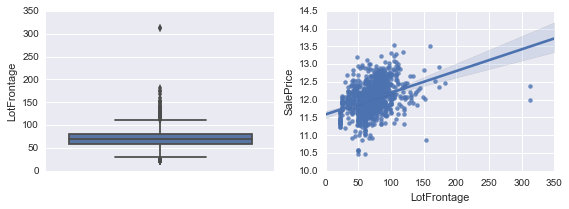

In [33]:
# LotFrontage
plot_outlier(train.LotFrontage,train.SalePrice)

SkewtestResult(statistic=-9.3415795461345592, pvalue=9.4907516524941023e-21)
sample length: 1460   and skew: -0.7278173750163186


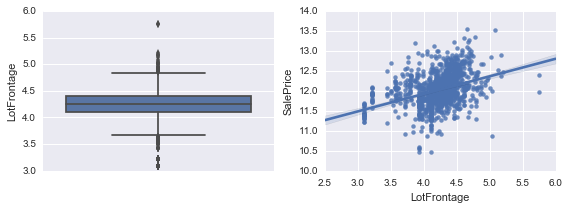

In [34]:
# LotFrontage
plot_outlier(np.log1p(train.LotFrontage),train.SalePrice)

SkewtestResult(statistic=5.2199165200575646, pvalue=1.7900379884851765e-07)
sample length: 1460   and skew: 0.3789137208901214


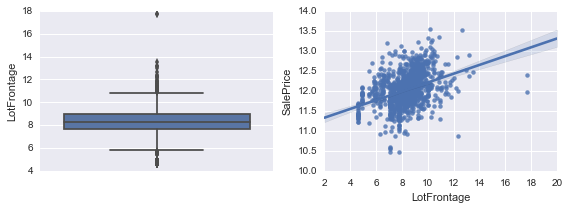

In [35]:
# LotFrontage
plot_outlier(np.sqrt(train.LotFrontage),train.SalePrice)

The lambda value of 0.25 here was selected after some testing of random values < 1.0.

SkewtestResult(statistic=-2.9504191693472874, pvalue=0.0031734306844319687)
sample length: 1460   and skew: -0.20945576348625186


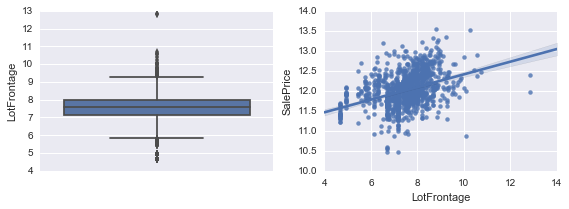

In [37]:
# LotFrontage
plot_outlier(boxcox1p(train.LotFrontage, 0.25),train.SalePrice)